## ノック91: データを読み込んで把握

In [28]:
import pandas as pd
survey = pd.read_csv("survey.csv")
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(AA駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [29]:
# 欠損値の確認
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

In [30]:
# 欠損値の除去
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

## ノック92: 不要な文字を除外

In [31]:
survey["comment"] = survey["comment"].str.replace("AA","")
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている(駅),1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [32]:
# 正規表現で半角括弧内の文字を削除
survey["comment"] = survey["comment"].str.replace("\(.+?\)","",regex=True)  # regex=Trueで正規表現を有効化  .+?は1文字以上を指定するコマンド
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる（待機児童なし）,4
4,2019/1/6,駅前商店街が寂しい,2


In [33]:
# 正規表現で全角括弧内の文字も削除
survey["comment"] = survey["comment"].str.replace("\（.+?\）","",regex=True)
survey.head()

,datetime,comment,satisfaction
0,2019/3/11,駅前に若者が集まっている,1
1,2019/2/25,スポーツできる場所があるのが良い,5
2,2019/2/18,子育て支援が嬉しい,5
3,2019/4/9,保育園に入れる,4
4,2019/1/6,駅前商店街が寂しい,2


## ノック93: 文字数をカウントしてヒストグラムを表示

In [34]:
# 文字数をヒストグラム化
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019/3/11,駅前に若者が集まっている,1,12
1,2019/2/25,スポーツできる場所があるのが良い,5,16
2,2019/2/18,子育て支援が嬉しい,5,9
3,2019/4/9,保育園に入れる,4,7
4,2019/1/6,駅前商店街が寂しい,2,9


(array([11., 24., 21., 10.,  6.,  6.,  5.,  0.,  0.,  1.]),
 array([ 4. ,  8.6, 13.2, 17.8, 22.4, 27. , 31.6, 36.2, 40.8, 45.4, 50. ]),
 <BarContainer object of 10 artists>)

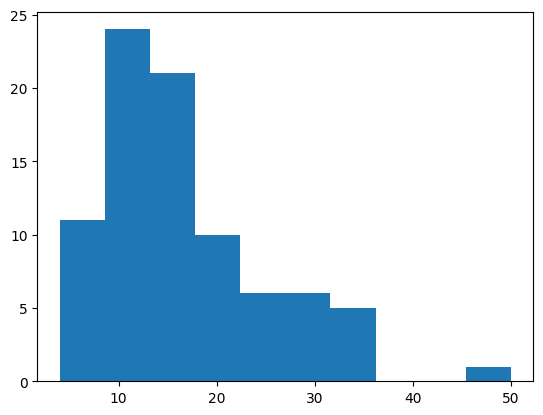

In [35]:
import matplotlib.pyplot as plt
plt.hist(survey["length"])

## ノック94: 形態素解析で文章を分割

In [36]:
# MeCabライブラリを用いて形態素解析
# !pip install mecab-python3 unidic-lite

In [37]:
# 形態素解析の練習
import MeCab
tagger = MeCab.Tagger()  # 初期化コマンド
text = "すもももももももものうち"
words = tagger.parse(text)  # parseを使用して形態素解析
print(words)

# \nで１つの単語に分割、\t以降は品詞等の付属情報を表している

すもも	スモモ	スモモ	李	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
も	モ	モ	も	助詞-係助詞			
もも	モモ	モモ	桃	名詞-普通名詞-一般			0
の	ノ	ノ	の	助詞-格助詞			
うち	ウチ	ウチ	内	名詞-普通名詞-副詞可能			0
EOS



In [38]:
# 分割した単語のみをリスト型変数に格納
words = tagger.parse(text).splitlines()  # splitlinesで \n毎にリスト型の変数として格納
print(words)

words_arr = []
for i in words:
  if i == "EOS":
    continue
  word_tmp = i.split("\t")[0]  # splitで \tで分割した際の0番目、つまり最初の単語文字列を取得
  words_arr.append(word_tmp)
print(words_arr)

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t', 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0', 'EOS']
['すもも', 'も', 'もも', 'も', 'もも', 'の', 'うち']


## ノック95: 形態素解析で文章から動詞と名詞を抽出

In [39]:
text = "すもももももももものうち"
words = tagger.parse(text).splitlines()
print(words)

['すもも\tスモモ\tスモモ\t李\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'も\tモ\tモ\tも\t助詞-係助詞\t\t\t', 'もも\tモモ\tモモ\t桃\t名詞-普通名詞-一般\t\t\t0', 'の\tノ\tノ\tの\t助詞-格助詞\t\t\t', 'うち\tウチ\tウチ\t内\t名詞-普通名詞-副詞可能\t\t\t0', 'EOS']


In [40]:
parts = ["名詞-普通名詞-一般","名詞-普通名詞-副詞可能"]  #wordsの中身を見た結果、名詞系だけ抽出するように指定
words_arr = []
for i in words:
  if i == "EOS": 
    continue
  word_tmp = i.split()[0]
  print(word_tmp)
  part = i.split("\t")[4].split(",")[0]
  print(part)
  if not part in parts: 
    continue
  words_arr.append(word_tmp)
print(words_arr)

すもも
名詞-普通名詞-一般
も
助詞-係助詞
もも
名詞-普通名詞-一般
も
助詞-係助詞
もも
名詞-普通名詞-一般
の
助詞-格助詞
うち
名詞-普通名詞-副詞可能
['すもも', 'もも', 'もも', 'うち']


## ノック96: 形態素解析で頻出する名詞を確認

In [41]:
# アンケート全体でどんな単語が含まれているか確認
# comment列を単語に分解して、all_wordsというリストへ格納していく
# unique_parts は名詞系統を抽出するために作成
all_words = []
unique_parts = []

parts = ["名詞-普通名詞-一般","名詞-普通名詞-形状詞可能",
         "名詞-普通名詞-サ変可能","名詞-普通名詞-副詞可能",
         "名詞-普通名詞-サ変形状詞可能","名詞-普通名詞-助数詞可能"] #unique_partsから名詞関係のみ抽出するように指定
for n in range(len(survey)):
  text = survey["comment"].iloc[n]
  # print(text)
  words = tagger.parse(text).splitlines()
  # print(words)
  words_arr = []
  for i in words:
    if i == "EOS":
      continue
    word_tmp = i.split()[0]
    # print(word_tmp)
    part = i.split("\t")[4].split(",")[0]
    # print(part)
    unique_parts.append(part)
    if not part in parts:
      continue
    words_arr.append(word_tmp)
  all_words.extend(words_arr)

In [42]:
# 単語の分類結果を分析して表示
unique_parts = pd.DataFrame(unique_parts)
print(len(unique_parts))

unique_parts = unique_parts[0].unique()
print(len(unique_parts))
unique_parts

788
29


array(['名詞-普通名詞-一般', '助詞-格助詞', '動詞-一般', '助詞-接続助詞', '動詞-非自立可能',
       '名詞-普通名詞-サ変可能', '助詞-準体助詞', '形容詞-非自立可能', '形容詞-一般', '接尾辞-名詞的-一般',
       '助詞-係助詞', '名詞-普通名詞-形状詞可能', '助動詞', '接頭辞', '副詞', '形状詞-一般',
       '名詞-普通名詞-副詞可能', '接尾辞-形容詞的', '助詞-副助詞', '代名詞', '補助記号-句点',
       '名詞-普通名詞-サ変形状詞可能', '名詞-普通名詞-助数詞可能', '補助記号-読点', '連体詞', '形状詞-助動詞語幹',
       '接尾辞-名詞的-サ変可能', '助詞-終助詞', '記号-一般'], dtype=object)

In [43]:
print(len(all_words))
print(all_words)

239
['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', 'BBB', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', 'ｘｘｘ', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート

In [44]:
# 単語毎に数え上げるためにDataFrameに格納し、集計を行い、頻出単語を5つ表示
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]}) #count列には全て1を代入している
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False)

,count
words,
駅前,7
場所,6
商店,5
公園,5
役所,5
...,...
声,1
地域,1
地,1


## ノック97: 関係の無い単語を除去

In [45]:
# 特定の単語をstop_wordsに入れて除外する
stop_words = ["ｘｘｘ","BBB"]
all_words = []
parts = ["名詞-普通名詞-一般","名詞-普通名詞-形状詞可能",
         "名詞-普通名詞-サ変可能","名詞-普通名詞-副詞可能",
         "名詞-普通名詞-サ変形状詞可能","名詞-普通名詞-助数詞可能"]
for n in range(len(survey)):
  text = survey["comment"].iloc[n]
  words = tagger.parse(text).splitlines()
  words_arr = []
  for i in words:
    if i == "EOS":
      continue
    word_tmp = i.split()[0]
    part = i.split("\t")[4].split(",")[0]
    if not part in parts:
      continue
    if word_tmp in stop_words:  # stop_wordsに入れた単語をwords_arrに追加しないようにしている
      continue
    words_arr.append(word_tmp)
  all_words.extend(words_arr)

print(len(all_words))
print(all_words)

237
['駅前', '若者', 'スポーツ', '場所', '子育て', '支援', '保育', '駅前', '商店', '生活', '便利', '場所', '場所', '商業', '施設', '病院', '充実', 'サイクリング', 'コース', '祭り', '学校', '公園', '近く', '公園', 'スーパー', '子育て', 'デート', 'スポット', '商店', '夜道', 'ゴミ', '処理', '楽', '映画', '街路', '公園', '追加', '観光', 'スポット', '子育て', '道', '都内', 'アクセス', '家賃', '渋滞', '商店', '屋根', '雨', '商店', '喫茶', 'スポーツ', 'ジム', '利用', 'スポーツ', 'ジム', '利用', '料金', 'ママ', '支援', 'バス', '自転', 'ランニング', '運動', '場所', '企業', '駅前', '駐車', '変', 'おじ', '声', '事', '警察', '巡回', '強化', '消防', '安心', '災害', '時', '避難', '場所', '気', '最近', '川', '氾濫', '被害', '町', '氾濫', '防止', '説明', '信号', '交差', '点', '事故', '信号', '商店', '活性', '活動', '行政', '後押し', '子ども', '安全', '場所', '駅前', '駐輪', '不便', '街路', '落ち葉', '掃除', '街路', '災害', '時', '備蓄', '状況', '歩道', '道', '安心', '地域', '自治', '体', '支援', '自治', '体', '活動', '安心', '観光', '地', '最近', '他県', 'ナンバー', '車', '防犯', '駐車', '数', '料金', '駅前', '公共', '駐車', '歩行', '信号', '老人', '子供', '事', '設定', '急行', '都内', 'バス', '路線', '春', '桜', '並木', '最高', '桜', '並木', '隣町', 'ごみ', '処理', '施設', '心配', '公害', '市長', '活気', 'アンケート', '確認', '街づくり

In [46]:
# 集計
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False)

,count
words,
駅前,7
場所,6
公園,5
役所,5
商店,5
...,...
声,1
地域,1
地,1


## ノック98: 顧客満足度と頻出単語の関係を見る

In [47]:
# 形態素解析と同時に、顧客満足度をsatisfactionに格納する
stop_words = ["ｘｘｘ","BBB"]
all_words = []
satisfaction = []
parts = ["名詞-普通名詞-一般","名詞-普通名詞-形状詞可能",
         "名詞-普通名詞-サ変可能","名詞-普通名詞-副詞可能",
         "名詞-普通名詞-サ変形状詞可能","名詞-普通名詞-助数詞可能"]
for n in range(len(survey)):
  text = survey["comment"].iloc[n]
  words = tagger.parse(text).splitlines()
  words_arr = []
  for i in words:
    if i == "EOS":
      continue
    word_tmp = i.split()[0]
    part = i.split("\t")[4].split(",")[0]
    if not part in parts:
      continue
    if word_tmp in stop_words:
      continue
    words_arr.append(word_tmp)
    satisfaction.append(survey['satisfaction'].iloc[n]) # satisfaction列を同時に抽出して追加
  all_words.extend(words_arr)

all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df

,words,satisfaction,count
0,駅前,1,1
1,若者,1,1
2,スポーツ,5,1
3,場所,5,1
4,子育て,5,1
...,...,...,...
232,道具,1,1
233,公園,2,1
234,駅前,1,1
235,駐車,1,1


In [48]:
# 集計
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"] # 平均値ベース
words_count = all_words_df.groupby("words").sum()["count"] # 合計点を求める
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df

,satisfaction,count
words,,
おじ,1.000000,1
ごみ,2.000000,1
とき,5.000000,1
まち,2.000000,1
アクセス,5.000000,1
...,...,...
駅前,1.428571,7
駐車,1.000000,4
駐輪,1.000000,1


In [49]:
# countが3以上の単語に絞って、顧客満足度の降順・昇順に5件並べる
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head() # 降順

,satisfaction,count
words,,
子育て,4.333333,3
安心,4.333333,3
スポーツ,3.666667,3
道,3.000000,3
支援,3.000000,3


In [50]:
words_df.sort_values("satisfaction", ascending=True).head()  # 昇順

,satisfaction,count
words,,
駐車,1.000000,4
信号,1.333333,3
駅前,1.428571,7
街路,1.666667,3
災害,2.000000,3


## ノック99: アンケート毎の特徴を表現

In [51]:
# 特定の単語にフラグを立てて特徴を表現
stop_words = ["ｘｘｘ","BBB"]
all_words_df = pd.DataFrame() # DataFrameに格納していく
parts = ["名詞-普通名詞-一般","名詞-普通名詞-形状詞可能",
         "名詞-普通名詞-サ変可能","名詞-普通名詞-副詞可能",
         "名詞-普通名詞-サ変形状詞可能","名詞-普通名詞-助数詞可能"]
for n in range(len(survey)):
  text = survey["comment"].iloc[n]
  words = tagger.parse(text).splitlines()
  words_df = pd.DataFrame()
  for i in words:
    if i == "EOS":
      continue
    word_tmp = i.split()[0]
    part = i.split("\t")[4].split(",")[0]
    if not part in parts:
      continue
    if word_tmp in stop_words:
      continue
    words_df[word_tmp] = [1] # 1を代入してフラグ立て
  all_words_df = pd.concat([all_words_df,words_df],ignore_index=True)
all_words_df

# フラグが立ってない欠損値には0を代入処理
all_words_df = all_words_df.fillna(0)
all_words_df

,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,...,まち,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ノック100: 類似アンケートを探す

In [52]:
# 基準とする回答を指定、確認
print(survey['comment'].iloc[2])
target_txt = all_words_df.iloc[2]
print(target_txt)

子育て支援が嬉しい
駅前      0.0
若者      0.0
スポーツ    0.0
場所      0.0
子育て     1.0
       ... 
サポート    0.0
校庭      0.0
芝生      0.0
投稿      0.0
道具      0.0
Name: 2, Length: 159, dtype: float64


In [53]:
# コサイン類似度を用いて、文書の類似度を検索
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
  cos_txt = all_words_df.iloc[i]
  cos = np.dot(target_txt, cos_txt) / (np.linalg.norm(target_txt) * np.linalg.norm(cos_txt)) # コサイン類似度を計算
  cos_sim.append(cos)
all_words_df['cos_sim'] = cos_sim
all_words_df.sort_values('cos_sim', ascending=False).head() # 類似度が高い順に表示

C:\Users\nao23\AppData\Local\Temp\ipykernel_7012\556200827.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_words_df['cos_sim'] = cos_sim


,駅前,若者,スポーツ,場所,子育て,支援,保育,商店,生活,便利,...,マスコット,夜間,不安,高齢,サポート,校庭,芝生,投稿,道具,cos_sim
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
33,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.353553


In [54]:
# 上位のコメントを表示
print(survey['comment'].iloc[2])
print(survey['comment'].iloc[50])
print(survey['comment'].iloc[33])
print(survey['comment'].iloc[24])
print(survey['comment'].iloc[15])

子育て支援が嬉しい
地域の自治体をもっと支援してほしい
働くママの支援をもっと増やして欲しい
子育てがしやすい
子育てしやすい
